# Short Term Investment

## Envelope

![picture 2](../images/2ecb5fd5756b9fb59418d490fd0a7a87e5b0226ebd069a13514c026d5ecf044d.png)  

평균 이동선을 기준으로 특정 범위를 지정하고


1. 평균 이동선 위 + 특정 범위 
2. 평균 이동선 위
3. 평균 이동선 아래 - 특정 범위 
4. 평균이동선, 특정 범위아래

4개 구역으로 나누고 영역 당 특정 전략을 취함

가장 간단한 투자 방법

### 모멘턴 투자자

A 투자 , B 매도

### 평균 회귀 투자자

D 매수, B 매도

In [9]:
import os, sys
import pandas as pd
import numpy as np
from datetime import datetime
sys.path.append('method.py')
from method import *

            Close  center     ub     lb
2020-12-24 217.15  225.27 247.80 202.75
2020-12-28 216.09  225.25 247.78 202.73
2020-12-29 216.25  225.53 248.08 202.98
2020-12-30 216.67  225.71 248.28 203.14
2020-12-31 214.06  225.22 247.74 202.70


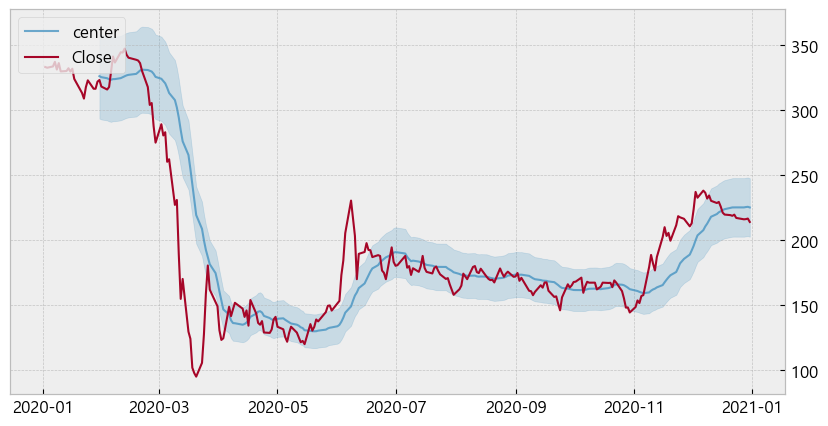

In [10]:

import finterstellar as fs

ba = fs.get_price('BA', '2020-01-01', end_date='2020-12-31')
ba['Close'] = ba['BA']

ba_envelope = get_envelope(ba, window=20, spread=.1)
print(ba_envelope.tail())


draw_band_chart(ba_envelope)


## 모멘텀 투자 ( A buy B sell)

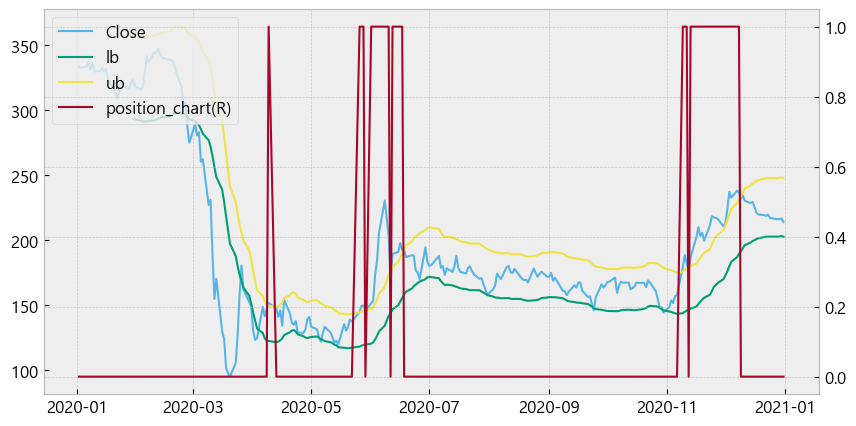

In [7]:
add_band_to_signal(ba_envelope, 'Close', 'A', 'B')
add_position_df(ba_envelope)
draw_chart(ba_envelope, ['Close', 'lb', 'ub'], 'position_chart')


CAGR: 38.38%
Accumulated return: 35.33%
Average return: 5.58%
Benchmark return : -33.79%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: 0.88
MDD: -26.49%
Benchmark MDD: -72.66%






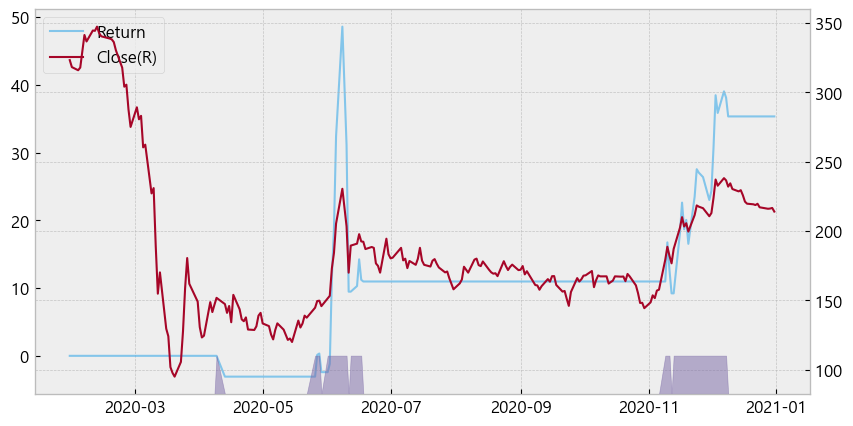

In [8]:
ba_envelope_result, _ = get_evaluate_column(ba_envelope, cost=.001)
draw_trade_results(ba_envelope_result)


## 평균 회귀 투자 ( D buy B sell)

CAGR: -22.11%
Accumulated return: -20.35%
Average return: -0.36%
Benchmark return : -33.79%
Number of trades: 4
Number of win: 3
Hit ratio: 75.00%
Investment period: 0.9yrs
Sharpe ratio: -0.27
MDD: -67.16%
Benchmark MDD: -72.66%






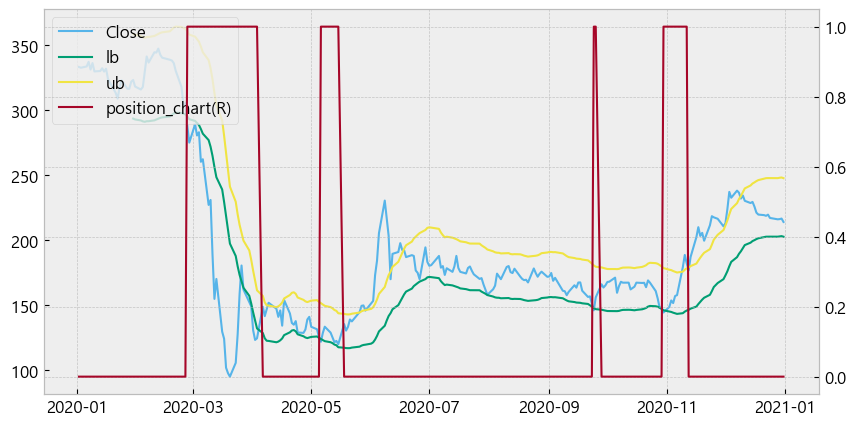

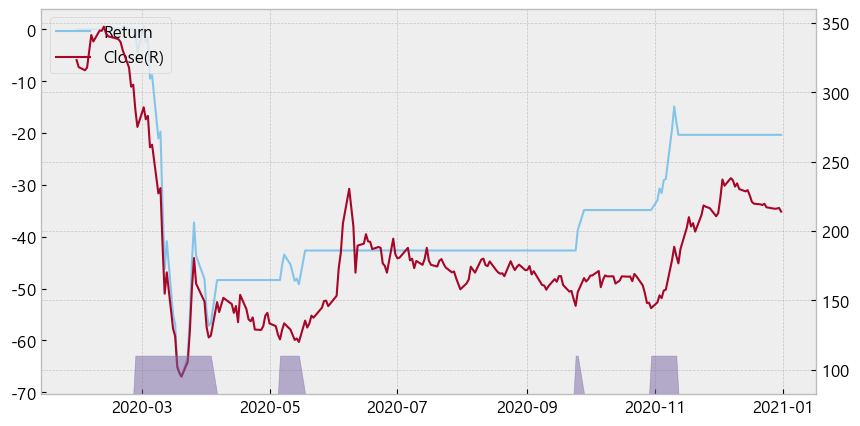

In [11]:
add_band_to_signal(ba_envelope, 'Close', 'D', 'B')
add_position_df(ba_envelope)
draw_chart(ba_envelope, ['Close', 'lb', 'ub'], 'position_chart')
ba_envelope_result, _ = get_evaluate_column(ba_envelope, cost=.001)
draw_trade_results(ba_envelope_result)
